In [1]:
import numpy as np
from sklearn.datasets import make_regression
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#step 1 generate data
X,y=make_regression(n_samples=500,n_features=10,n_informative=5,noise=25,random_state=0)
#random state means everytime u generate a data its random not comsistent
print(X.shape,y.shape)
n_features=X.shape[1]

(500, 10) (500,)


In [3]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.626490,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
2,0.093953,-0.130107,0.929505,0.582225,-2.739677,0.943046,-2.094603,-0.569312,0.269904,0.123722
3,-1.542758,-0.789954,0.537035,-0.286835,-2.369623,-0.767332,1.634406,-0.260560,0.128957,0.571227
4,-0.101003,-2.231538,0.436187,1.571463,1.324868,-0.587375,1.077315,0.840648,0.261106,0.811090


In [4]:
#step_2 normalize
X.mean(axis=0)#take mean column wise

array([-0.02995589, -0.07127637, -0.09357268,  0.04844928, -0.03183627,
        0.01762592, -0.0091391 ,  0.00855508,  0.06286967, -0.04898012])

In [5]:
def normalize(X):
    u=X.mean(axis=0)
    std=X.std(axis=0)
    
    return (X-u)/std

In [6]:
X=normalize(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


In [7]:
X.std(axis=0)#std is 1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

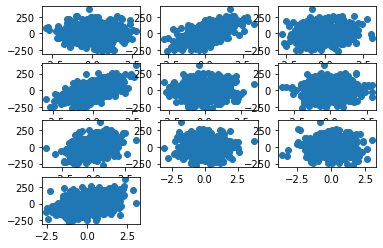

In [8]:
#visualization of y as a function of x
import matplotlib.pyplot as plt
for f in range(0,10):
    plt.subplot(4,3,f+1)#4 x 3 grid (f+1) is simply id
    plt.scatter(X[:,f],y)
plt.show()

In [9]:
# step-4 train_test split
XT,xt,yT,yt=train_test_split(X,y,test_size=0.3,shuffle=False,random_state=0)

In [10]:
print(XT.shape,yT.shape)
print(xt.shape,yt.shape)

(350, 10) (350,)
(150, 10) (150,)


In [11]:
#step 5 modelling 
def hypothesis(X,theta):
    return np.dot(X,theta)
# theta 1 to n are weights/ theta 0 is intercept
# X is a matrix containing  all the independent variables corressponding to theta 0 we store 1 in all rows
# theta0+ theta1*x1+theta2*x2+theta3*x3+theta4*x4----


In [12]:
def loss(X,y,theta):
    yp=hypothesis(X,theta)
    error=np.mean((y-yp)**2)#calculating avg of all the values we get after substraction
    return error

In [13]:
def gradient(X,y,theta):
    #matrix would look like [d J(theta)/d(theta0)]
                           #[d J(theta)/d[theta1]]
                           #[d J(theta)/d[thetaN]
                           #[d J(theta)/d[thetaj]]=1/m sigma 1 to m [yp-y]*xj^(i)
    yp=hypothesis(X,theta)
    grad=np.dot(X.T,(yp-y))
    m=X.shape[0]
    return grad/m


In [14]:
def preprocess(X):
    #adding one exrta col
    m=X.shape[0]
    ones=np.ones((m,1))
    X=  np.hstack((ones,X))
    return X


In [15]:
XT=preprocess(XT)
xt=preprocess(xt)
pd.DataFrame(xt).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.380120,-1.608560,0.894234,-0.732015,1.202873,0.751059,0.648103,0.508513,0.973305,0.146121
1,1.0,-0.689528,0.346217,0.818937,-0.311306,-0.451494,-0.036386,-0.726983,0.926824,0.496303,-1.616375
2,1.0,-0.962410,0.643684,1.049404,1.240352,-0.466771,-0.771889,-0.281077,0.313829,0.905124,1.326589
3,1.0,-0.484110,-0.643819,0.398908,1.094658,0.780851,-0.552358,-1.005677,-1.095396,0.133798,0.624995
4,1.0,-1.391803,1.145077,0.556121,1.200014,1.594596,0.534809,1.527785,-0.049003,1.354072,0.268844


In [22]:
def train(X,y,learning_rate=0.1,max_iterations=100):
    n=X.shape[1]
    theta=np.random.random(n)
    error_list=[]
    for i in range(max_iterations):
        grad=gradient(X,y,theta)
        e=loss(X,y,theta)
        error_list.append(e)
        theta=theta-learning_rate*grad
    plt.plot(error_list)
    return theta

[-5.11323863 -0.25830385 61.7729455  11.35524967 65.46116064 -0.46598734
  0.90861842 41.16695978  0.52791172  0.73304884 22.52497726]


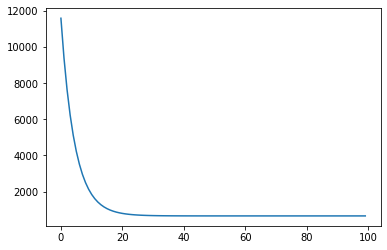

In [23]:
theta=train(XT,yT)
print(theta)

In [25]:
def r2score(y,yp):
    ymean=y.mean()
    num=np.sum((y-yp)**2)
    denom=np.sum((y-ymean)**2)
    return 1-num/denom

In [27]:
yp=hypothesis(xt,theta)

In [28]:
r2score(yt,yp)

0.9360543397973013

In [29]:
#linear regression using SK-Learn
from sklearn.linear_model import LinearRegression


In [30]:
model=LinearRegression()

In [31]:
model.fit(XT,yT)

LinearRegression()

In [32]:
yp=model.predict(xt)

In [33]:
yp.shape

(150,)

In [34]:
model.score(xt,yt)

0.9360505153524048

In [35]:
model.intercept_

-5.113880843041464

In [36]:
model.coef_

array([ 0.        , -0.25771484, 61.77353658, 11.35784083, 65.4648774 ,
       -0.46793224,  0.90619581, 41.17039764,  0.52928688,  0.73035413,
       22.5219858 ])